### 逻辑回归

$
f_{\vec{w},b}(\vec{x}) = \frac{1}{1 + e^-(\vec{w}\vec{x} + b)}
$

### 决策边界

$ 
f_{\vec{w},b}(\vec{x}) = 0.5
=>
\vec{w}\vec{x} + b = 0 
$

### 成本函数

$ 
L(f_{\vec{w},b}(\vec{x}^{(i)}),y^{(i)}) = 
\begin{cases}
-\log(f_{\vec{w},b}(\vec{x}^{(i)})),\quad y^{(i)} = 1 \\
-\log(1-f_{\vec{w},b}(\vec{x}^{(i)})),\quad y^{(i)} = 0
\end{cases}
$

$
J(\vec{w},b) = \frac{1}{m}\sum_{i=1}^m L(f_{\vec{w},b}(\vec{x}^{(i)}),y^{(i)})
= -y^{(i)}\log f_{\vec{w},b}(\vec{x}^{(i)}) - (1-y^{(i)})\log(1-f_{\vec{w},b}(\vec{x}^{(i)}))
$

### 梯度下降

w = w - $\alpha \frac{\partial}{\partial w} J_{(w, b)}  = w - \frac{\alpha}{m}\sum_{i=1}^m{(f_{\vec{w},b}(\vec{x})-y^i)x^i} $

b = b - $\alpha \frac{\partial}{\partial b} J_{(w, b)} = w - \frac{\alpha}{m}\sum_{i=1}^m{(f_{\vec{w},b}(\vec{x})-y^i)} $

### pyhton实现

In [1]:
import numpy as np

In [4]:
#sigmoid函数
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
#初始化参数w,b
def initialize_with_zeros(dim):
    w = np.zeros((dim,1)) #w为一个dim*1矩阵
    b = 0    
    return w, b

In [ ]:
#计算Y_hat,成本函数J以及dw，db
def propagate(w, b, X, Y):
    m = X.shape[1] #样本个数
    Y_hat = sigmoid(np.dot(w.T,X)+b)                                     
    cost = -(np.sum(np.dot(Y,np.log(Y_hat).T)+np.dot((1-Y),np.log(1-Y_hat).T)))/m #成本函数

    dw = (np.dot(X,(Y_hat-Y).T))/m
    db = (np.sum(Y_hat-Y))/m

    cost = np.squeeze(cost) #压缩维度    
    grads = {"dw": dw,
             "db": db} #梯度

    return grads, cost

In [ ]:
#梯度下降找出最优解
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):#num_iterations-梯度下降次数 learning_rate-学习率
    costs = [] #记录成本值

    for i in range(num_iterations): #循环进行梯度下降
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0: #每100次记录一次成本值
            costs.append(cost)

        if print_cost and i % 100 == 0: #打印成本值
            print ("循环%i次后的成本值: %f" %(i, cost))

    params = {"w": w,
              "b": b} #最终参数值

    grads = {"dw": dw,
             "db": db}#最终梯度值

    return params, grads, costs

### 绘图

In [3]:
from matplotlib import pyplot as plt

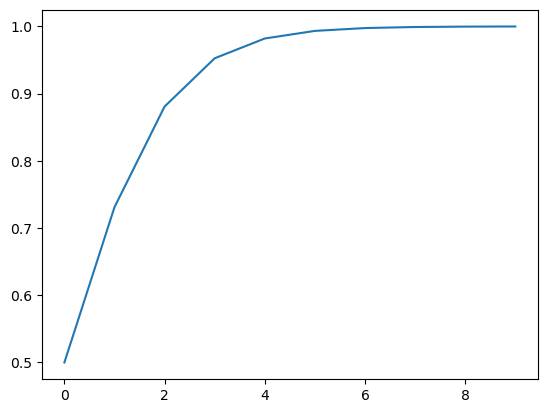

In [7]:
# sigmoid函数
x = np.arange(10)
plt.plot(x, sigmoid(x))